<a href="https://colab.research.google.com/github/Suriyaskrs/Parkinson_Disease_Prediciton/blob/main/PDMLF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PREDICTION MODEL FLOW**

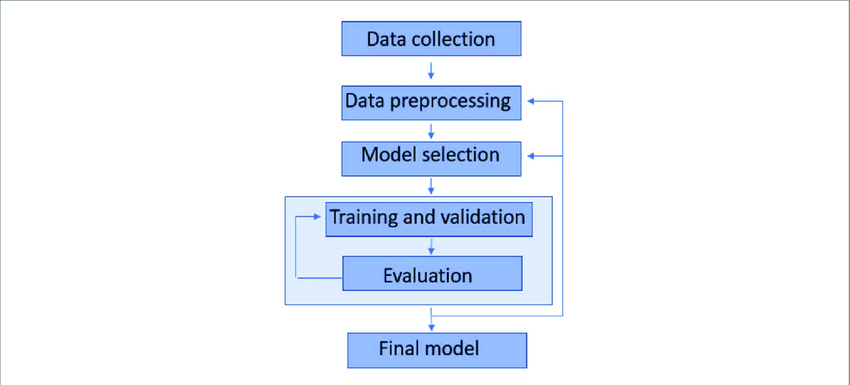)

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn import svm
import mlxtend
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
#Test Train Split
from sklearn import model_selection
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix ,jaccard_score, f1_score, log_loss
from sklearn.impute import SimpleImputer
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load libraries

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

## **DATASET LOADING**

In [ ]:
data = pd.read_csv("/content/DATASET.csv")

In [ ]:
data.shape # Check number of columns and rows in data frame

(405, 16)

In [ ]:
data.head(5)

,SUBJECT,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,status
0,1,0.00784,0.00007,0.00370,0.01109,0.04374,0.426,0.02182,0.03130,0.06545,0.02211,21.033,0.414783,0.815285,0.284654,1
1,2,0.00968,0.00008,0.00465,0.01394,0.06134,0.626,0.03134,0.04518,0.09403,0.01929,19.085,0.458359,0.819521,0.368674,1
2,3,0.01050,0.00009,0.00544,0.01633,0.05233,0.482,0.02757,0.03858,0.08270,0.01309,20.651,0.429895,0.825288,0.332634,1
3,4,0.00997,0.00009,0.00502,0.01505,0.05492,0.517,0.02924,0.04005,0.08771,0.01353,20.644,0.434969,0.819235,0.368975,1
4,5,0.01284,0.00011,0.00655,0.01966,0.06425,0.584,0.03490,0.04825,0.10470,0.01767,19.649,0.417356,0.823484,0.410335,1


In [ ]:
data.describe()

,SUBJECT,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,status
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,203.000000,0.007010,0.000049,0.003592,0.010778,0.035531,0.329336,0.018070,0.021312,0.054210,0.034046,21.001022,0.538953,0.693980,0.227408,0.881481
std,117.057678,0.007438,0.000043,0.004264,0.012791,0.026114,0.243611,0.013198,0.017423,0.039594,0.058864,4.522972,0.115534,0.066721,0.098317,0.323621
min,1.000000,0.001680,0.000006,0.000680,0.002040,0.009540,0.085000,0.004550,0.005440,0.013640,0.000650,2.964000,0.256570,0.534080,0.044539,0.000000
25%,102.000000,0.003760,0.000025,0.001700,0.005100,0.018960,0.176000,0.009690,0.010920,0.029080,0.009100,18.801000,0.457702,0.643956,0.160691,1.000000
50%,203.000000,0.005170,0.000036,0.002540,0.007610,0.029060,0.264000,0.014540,0.017090,0.043630,0.018130,21.083000,0.546350,0.691483,0.212310,1.000000
75%,304.000000,0.007510,0.000060,0.003910,0.011720,0.041280,0.383000,0.021870,0.024660,0.065620,0.033285,24.284000,0.620060,0.742055,0.275430,1.000000
max,405.000000,0.085890,0.000391,0.049610,0.148830,0.204060,1.752000,0.107050,0.142810,0.321140,0.554280,33.047000,0.908940,0.859200,0.731520,1.000000


## **DATA PREPROCESSING**

In [ ]:
from sklearn.impute import SimpleImputer
#dt = pd.read_csv("/content/PREPROC.csv")
imputer= SimpleImputer(strategy='mean')
for column in data.columns[1:]:
  data[column] = imputer.fit_transform(data[[column]])
data=data.drop_duplicates()
data=data.T.drop_duplicates().T

In [ ]:
data.isnull().values.any() # to check If there are any null values in data set

False

In [ ]:
for column in data.columns[1:len(data.columns)-1]:
    sns.boxplot(x= data[column], color='cyan')
    plt.show()
    print('Boxplot of ',column)
    #calculating the outiers in attribute
    Q1 = data[column].quantile(0.25)
    Q2 = data[column].quantile(0.50)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (data[column] < (Q1 - 1.5 *IQR)) |(data[column] > (Q3 + 1.5 * IQR))
    print('Out of ',len(data) ,'rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

NameError: name 'data' is not defined

# **UNIVARIATE ANALYSIS**

# **HISTOGRAM**

<Figure size 300x300 with 0 Axes>

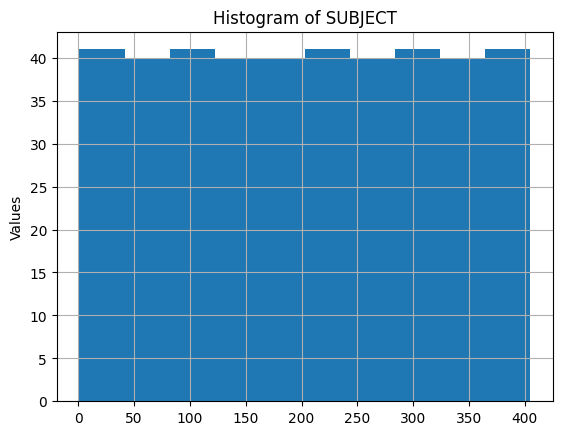

<Figure size 300x300 with 0 Axes>

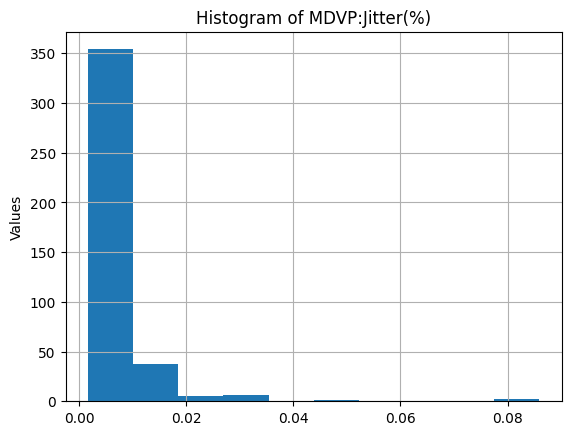

<Figure size 300x300 with 0 Axes>

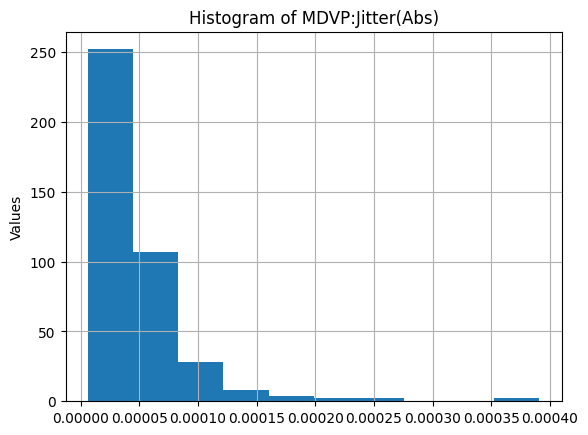

<Figure size 300x300 with 0 Axes>

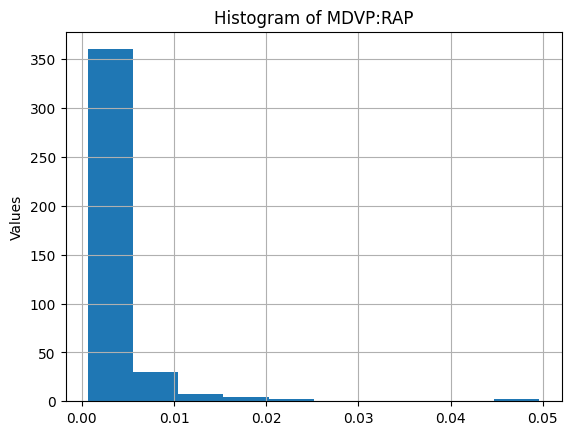

<Figure size 300x300 with 0 Axes>

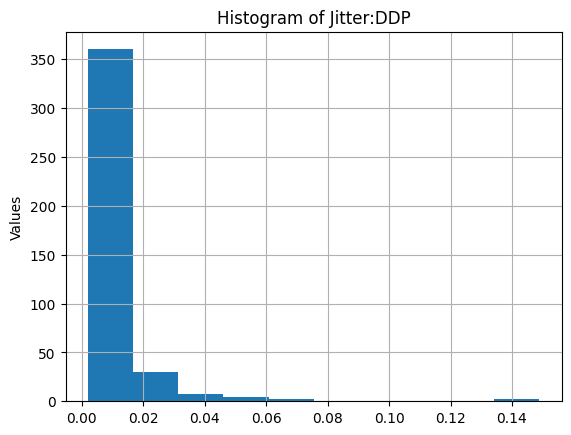

<Figure size 300x300 with 0 Axes>

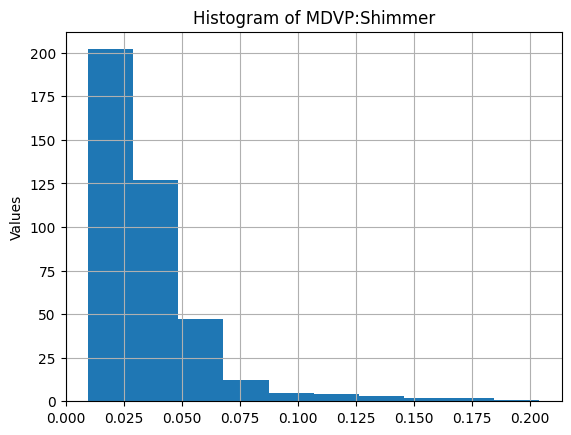

<Figure size 300x300 with 0 Axes>

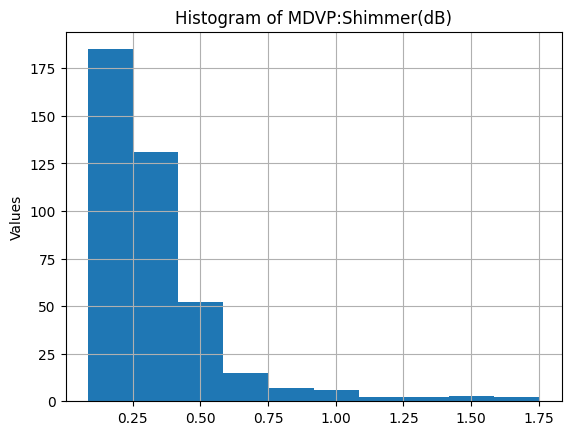

<Figure size 300x300 with 0 Axes>

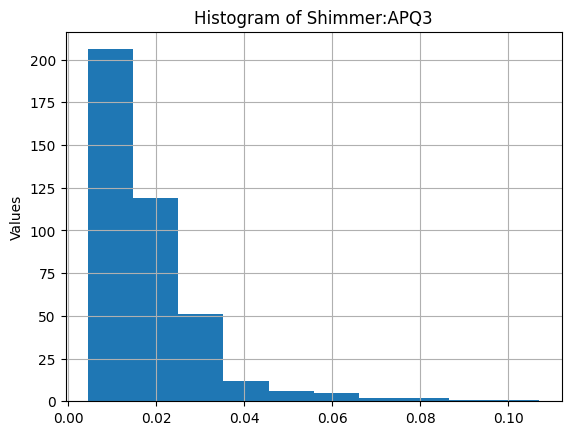

<Figure size 300x300 with 0 Axes>

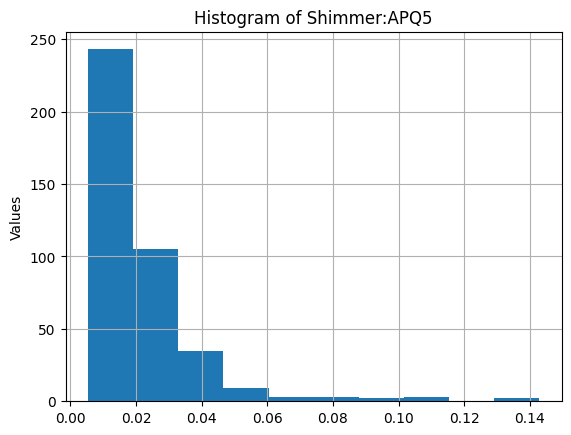

<Figure size 300x300 with 0 Axes>

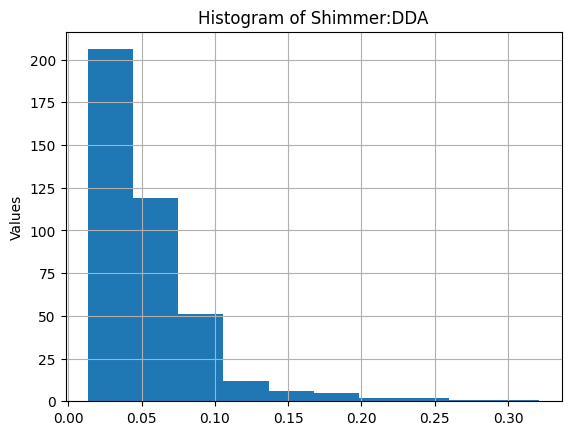

<Figure size 300x300 with 0 Axes>

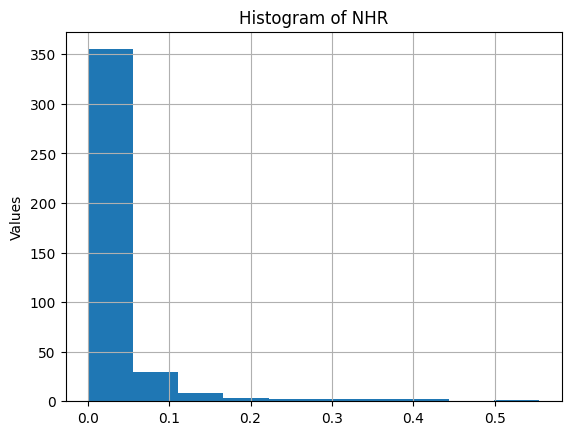

<Figure size 300x300 with 0 Axes>

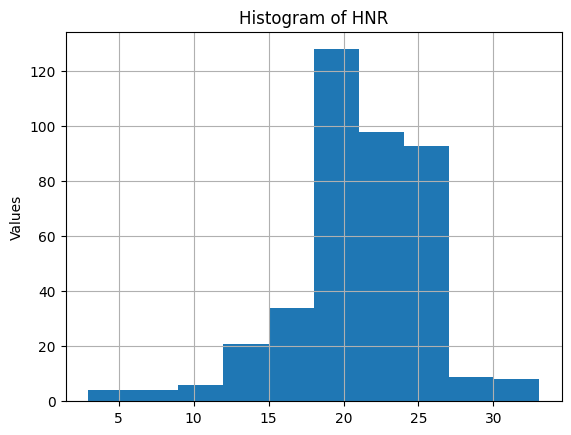

<Figure size 300x300 with 0 Axes>

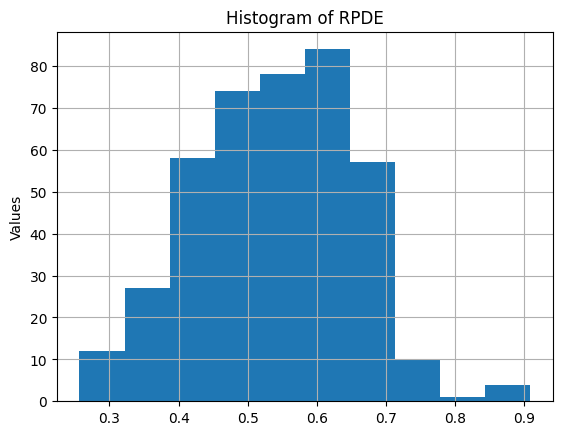

<Figure size 300x300 with 0 Axes>

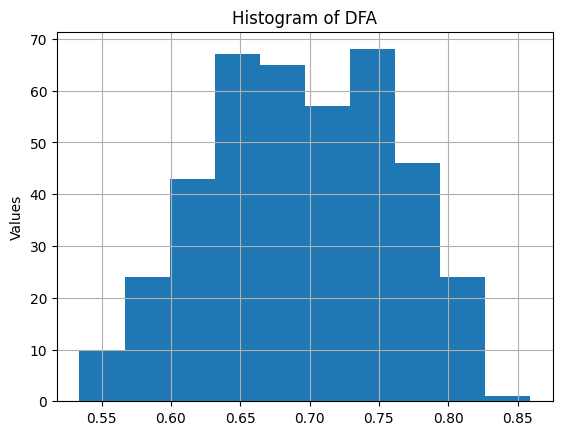

<Figure size 300x300 with 0 Axes>

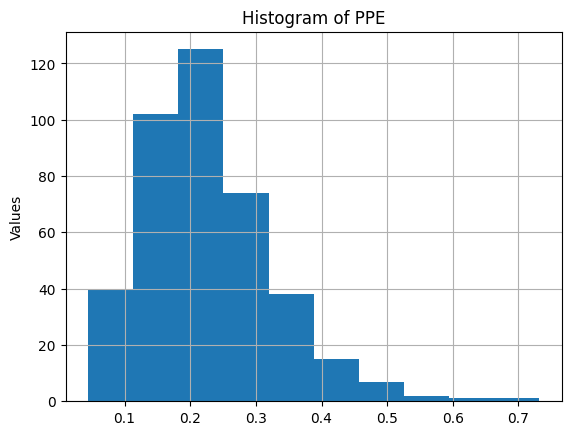

<Figure size 300x300 with 0 Axes>

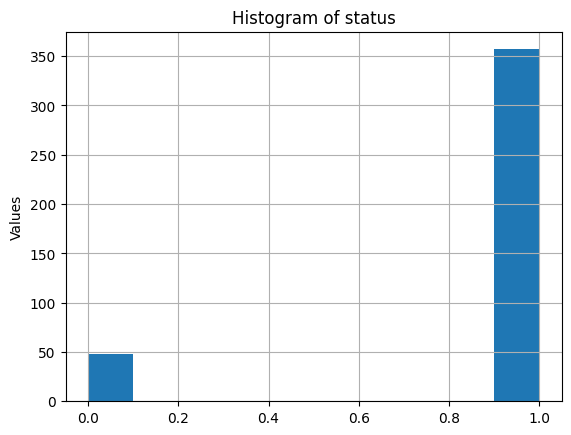

<Figure size 640x480 with 0 Axes>

In [ ]:
for column in data.columns[:]:
    plt.figure(figsize=(3, 3))
    data.hist(column)
    plt.title(f'Histogram of {column}')
    plt.ylabel('Values')
    plt.show()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# **SCATTER PLOT**

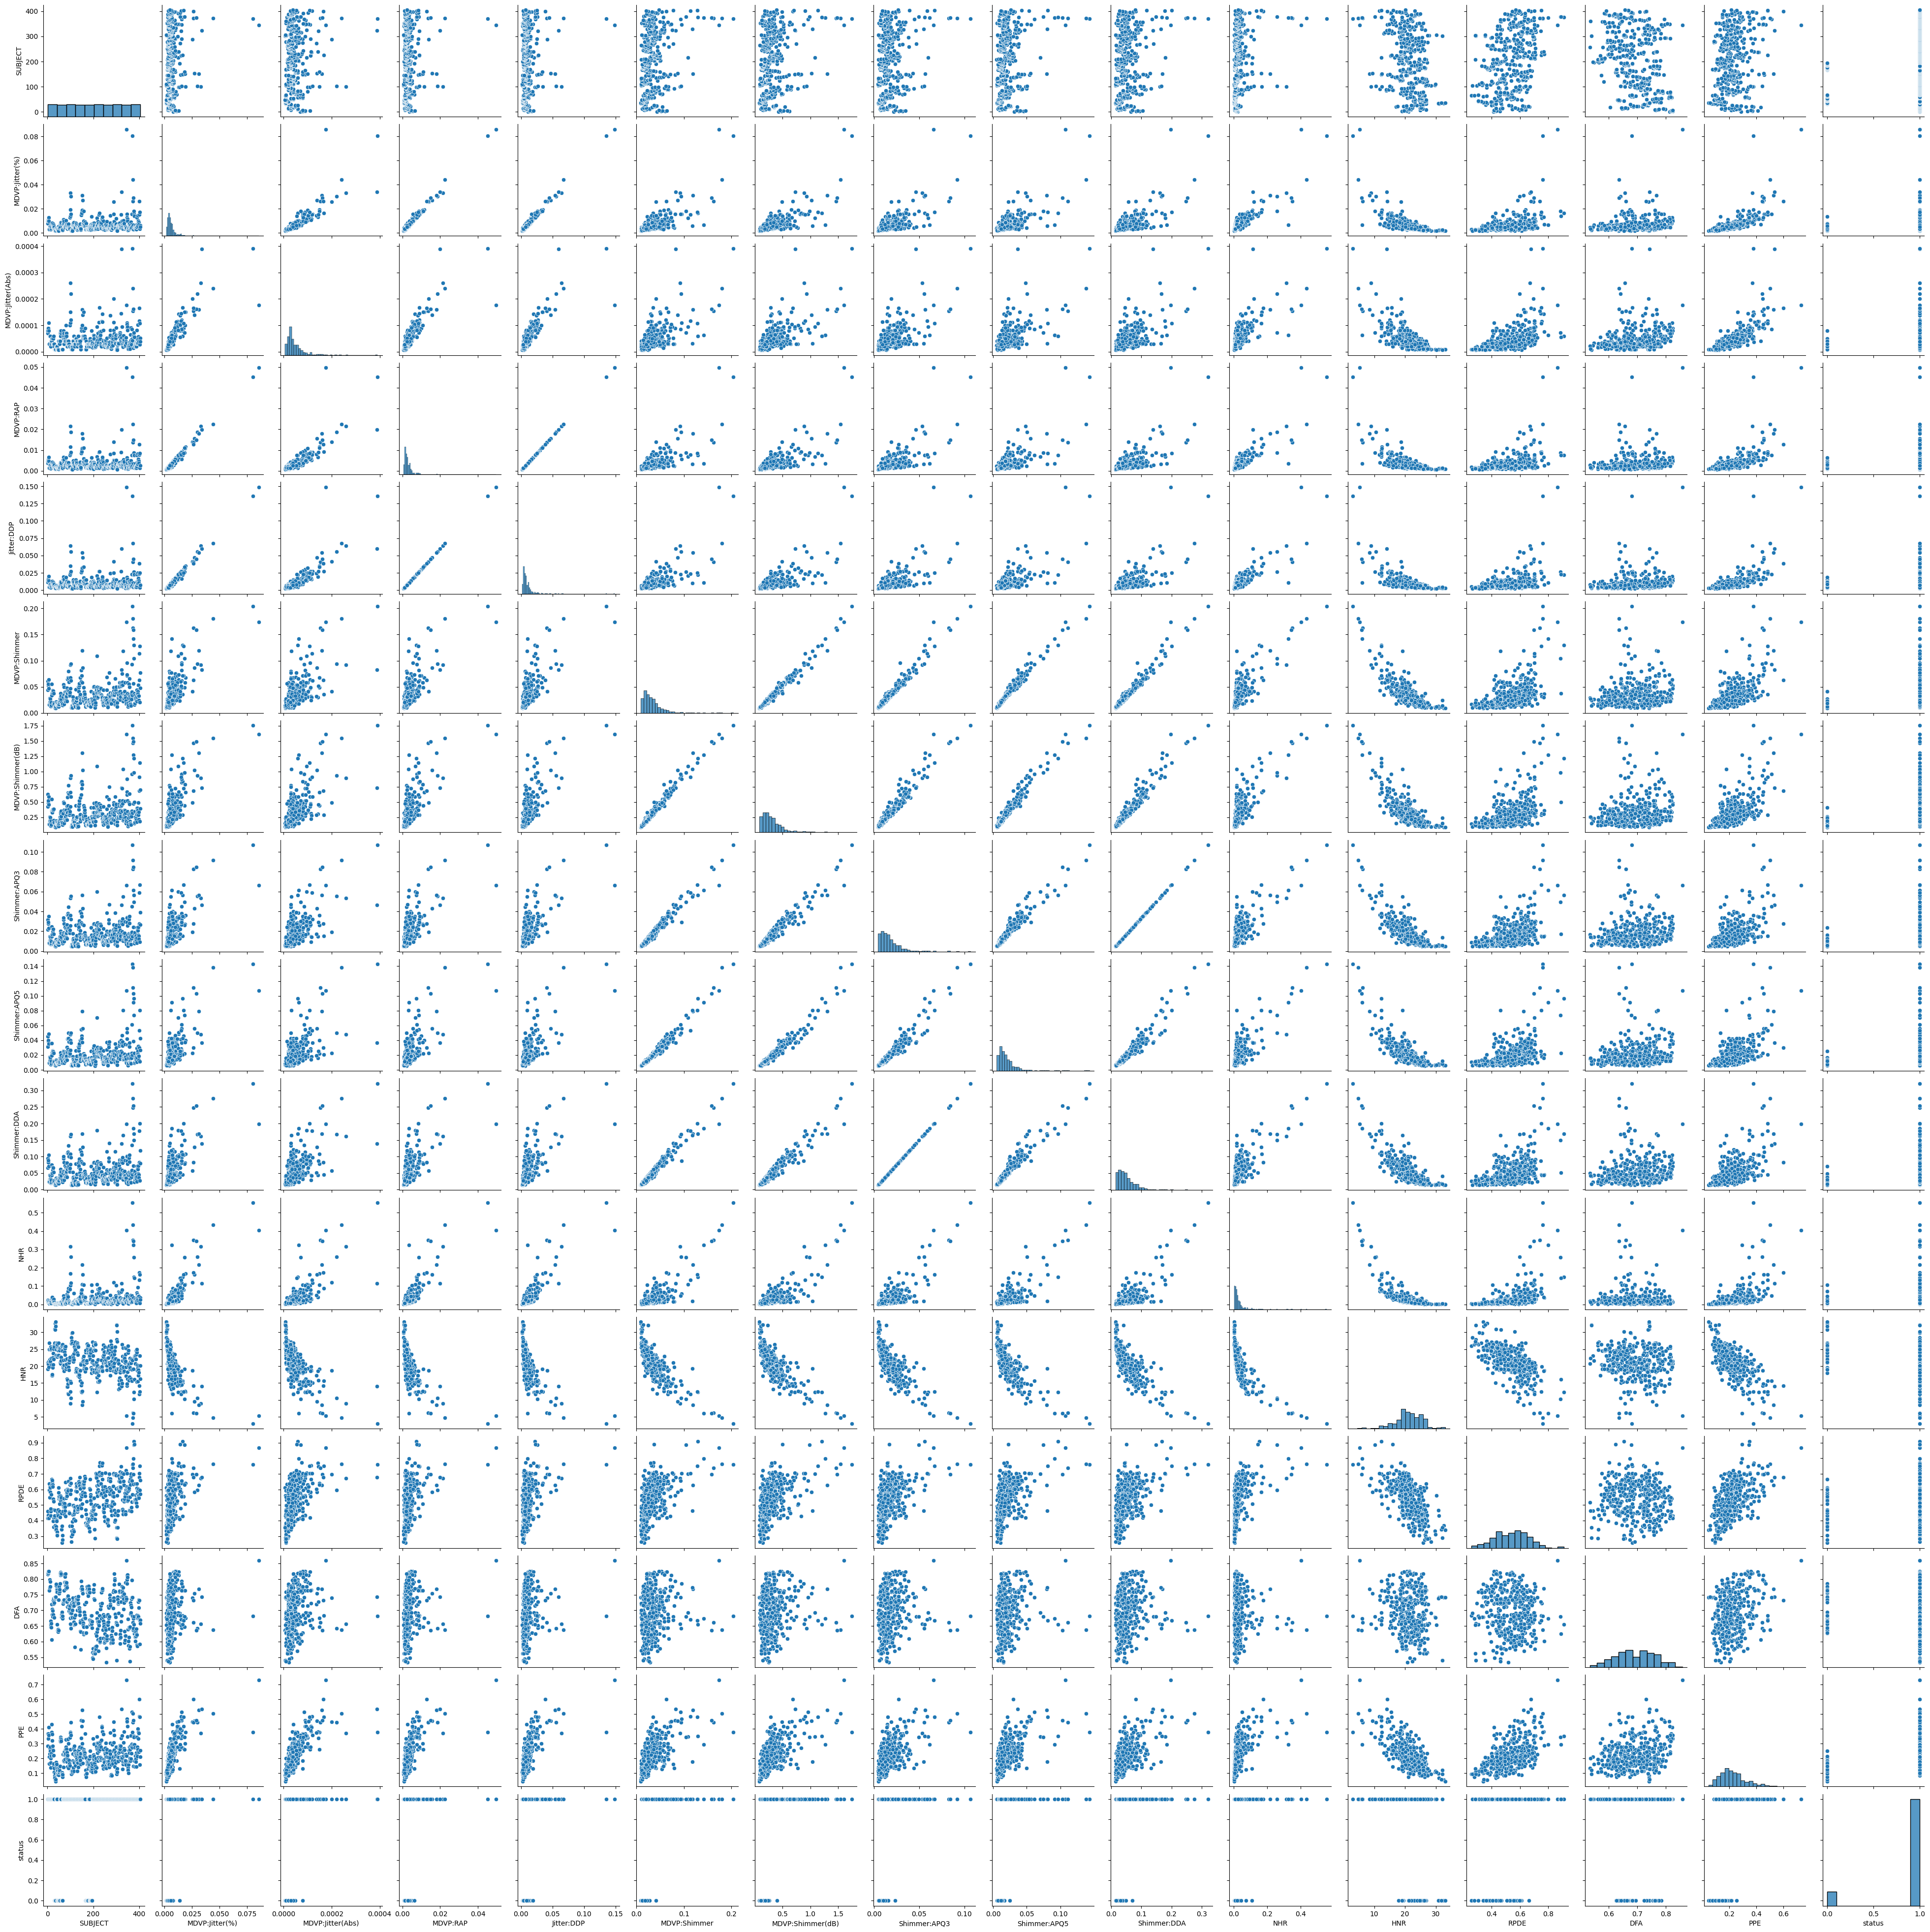

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 16 features
# Make sure your dataset has no categorical or non-numeric columns for the scatter plot to work well
df=data.copy()
# Pair plot for all features
sns.pairplot(df)
plt.show()


## **USING BIVARIATE ANALYSIS TO UNDERSTAND THE CORRELATION**

<Axes: >

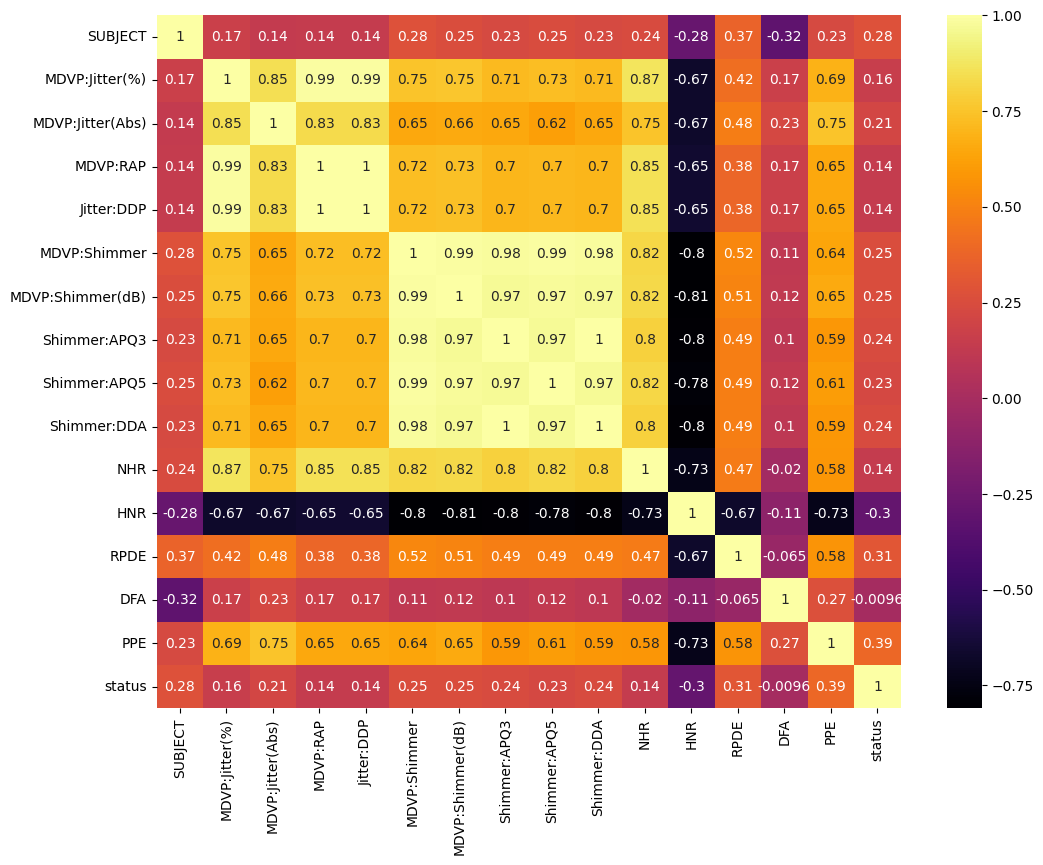

In [ ]:
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corr, cmap='inferno', annot=True)


## **FEATURE SELECTION**

**Dropping columns which are highly correlated to others since highly correlated data gives inaccurate results**

In [ ]:
data=data.drop(['MDVP:RAP','Jitter:DDP','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA'],axis=1)
data.shape

(405, 10)

In [ ]:
data.columns

Index(['SUBJECT', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR',
       'HNR', 'RPDE', 'DFA', 'PPE', 'status'],
      dtype='object')

<Axes: >

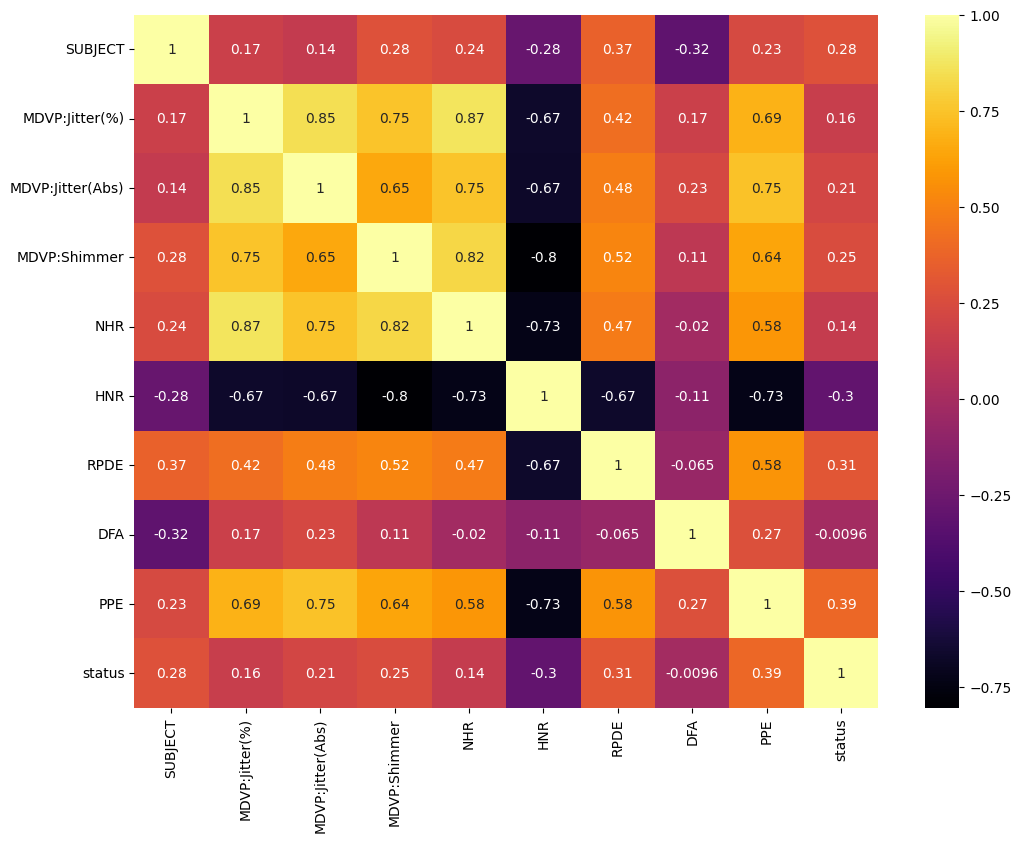

In [ ]:
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corr, cmap='inferno', annot=True)


## **SPLITTING THE DATASET INTO TEST AND TRAIN SETS**

In [ ]:
# Assuming 'data' is your dataframe
df = data.copy()
#df=df.drop('SUBJECT',axis=1)
# Defining the features (X) and target (y)
X = df.drop(['SUBJECT','status'], axis=1)  # Features (all columns except 'status')
y = df['status']  # Target column (status)

# Scaling the features
SC = StandardScaler()
XSC = SC.fit_transform(X)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(XSC, y, train_size=0.7, test_size=0.3, random_state=56)
# Verifying the class distribution in training and test sets
print('X_train value counts are:', X_train.shape)
print('y_train value counts are:', y_train.shape)
print('X_test value counts are:', X_test.shape)
print('y_test value counts are:', y_test.shape)

X_train value counts are: (283, 8)
y_train value counts are: (283,)
X_test value counts are: (122, 8)
y_test value counts are: (122,)


## **LOGISTIC REGRESSION**

In [ ]:
# Fit Logistic Regression model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#confusion matrix of logistic regression on heatmap
LGRcm_matrix = metrics.confusion_matrix(y_test,logreg.predict(X_test))
HM = pd.DataFrame(LGRcm_matrix, index = [i for i in ['0','1']],columns = [i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(4,2))
print('Confusion matrix for logistic regression ')
sns.heatmap(HM,cmap='coolwarm',annot=True, fmt='g')
plt.show()


Accuracy: 93.44%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.58      0.64        12
         1.0       0.96      0.97      0.96       110

    accuracy                           0.93       122
   macro avg       0.83      0.78      0.80       122
weighted avg       0.93      0.93      0.93       122



Confusion matrix for logistic regression 


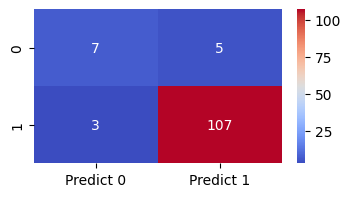

In [ ]:
#confusion matrix of logistic regression on heatmap
LGRcm_matrix = metrics.confusion_matrix(y_test,logreg.predict(X_test))
HM = pd.DataFrame(LGRcm_matrix, index = [i for i in ['0','1']],columns = [i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(4,2))
print('Confusion matrix for logistic regression ')
sns.heatmap(HM,cmap='coolwarm',annot=True, fmt='g')
plt.show()


Logistic regression Area Under the Curv(AUC):  78


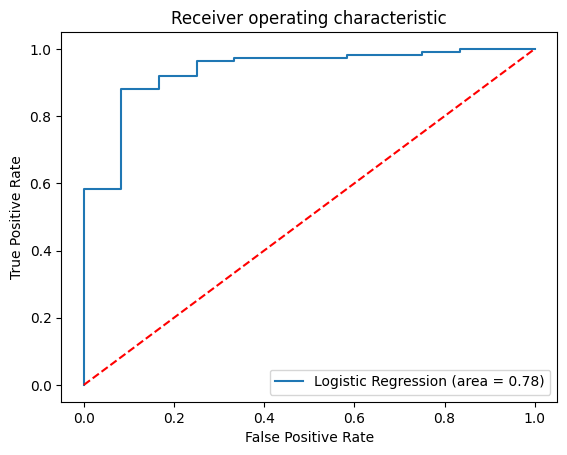

In [ ]:
# ROC CURVE OF LOGISTIC REGRESSION
print('Logistic regression Area Under the Curv(AUC): ',round(roc_auc_score(y_test,logreg.predict(X_test))*100))

#Area Under the ROC Curv of Logistic Regression
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## **K-Nearest Neighbors**

In [ ]:
# Initialize and train the K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors based on your choice
knn_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = knn_classifier.predict(X_test)
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

KNN_matrix = metrics.confusion_matrix(y_test,knn_classifier.predict(X_test))
HM = pd.DataFrame(KNN_matrix, index = [i for i in ['0','1']],columns = [i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(4,2))
sns.heatmap(HM,cmap='coolwarm',annot=True, fmt='g')
plt.show()

Accuracy: 92.62%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.75      0.67        12
         1.0       0.97      0.95      0.96       110

    accuracy                           0.93       122
   macro avg       0.79      0.85      0.81       122
weighted avg       0.94      0.93      0.93       122



Confusion matrix for KNN 


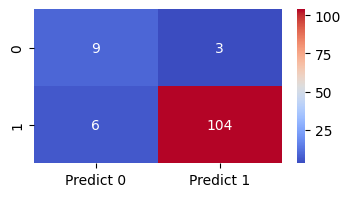

In [ ]:
KNN_matrix = metrics.confusion_matrix(y_test,knn_classifier.predict(X_test))
HM = pd.DataFrame(KNN_matrix, index = [i for i in ['0','1']],columns = [i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(4,2))
sns.heatmap(HM,cmap='coolwarm',annot=True, fmt='g')
plt.show()

KNN->Area Under the Curv(AUC):  85


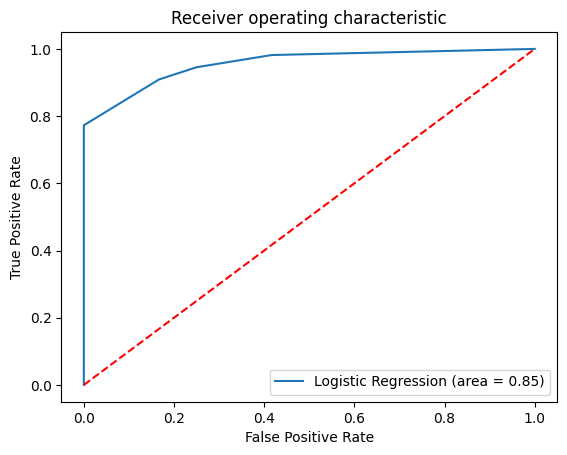

In [ ]:
# ROC CURVE Of KNN
print('KNN->Area Under the Curv(AUC): ',round(roc_auc_score(y_test,knn_classifier.predict(X_test))*100))

#Area Under the ROC Curv of KNN
knn_roc_auc = roc_auc_score(y_test, knn_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('_ROC')
plt.show()

## **SVM**

In [ ]:
# Initialize and train the Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear',probability=True)  # We can change the kernel based on your choice (e.g., 'rbf', 'poly')
svm_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred_svm = svm_classifier.predict(X_test)
# Accuracy Score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy: {}%".format(round(accuracy_svm * 100, 1)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM_matrix = metrics.confusion_matrix(y_test,svm_classifier.predict(X_test))
HM = pd.DataFrame(SVM_matrix, index = [i for i in ['0','1']],columns = [i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(4,2))
print('Confusion matrix for SVM')
sns.heatmap(HM,cmap='coolwarm',annot=True, fmt='g')
plt.show()

Accuracy: 94.3%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.75      0.72        12
         1.0       0.97      0.96      0.97       110

    accuracy                           0.94       122
   macro avg       0.83      0.86      0.84       122
weighted avg       0.94      0.94      0.94       122



Confusion matrix for SVM


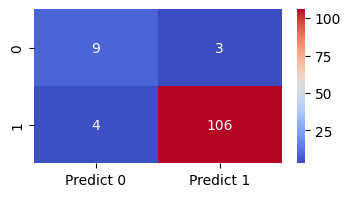

In [ ]:
SVM_matrix = metrics.confusion_matrix(y_test,svm_classifier.predict(X_test))
HM = pd.DataFrame(SVM_matrix, index = [i for i in ['0','1']],columns = [i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(4,2))
print('Confusion matrix for SVM')
sns.heatmap(HM,cmap='coolwarm',annot=True, fmt='g')
plt.show()

SVM->Area Under the Curv(AUC):  86


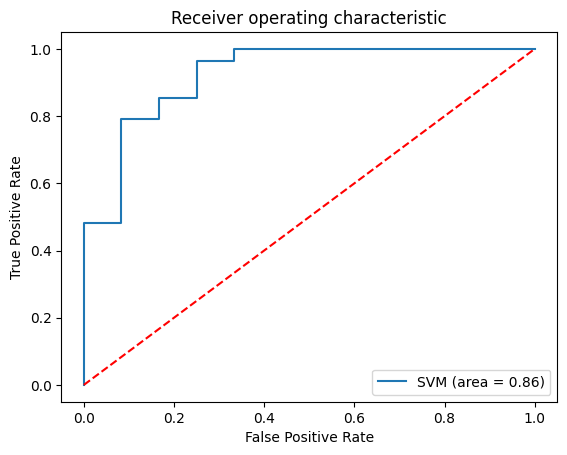

In [ ]:
# ROC CURVE Of KNN
print('SVM->Area Under the Curv(AUC): ',round(roc_auc_score(y_test,svm_classifier.predict(X_test))*100))

#Area Under the ROC Curv of KNN
svm_roc_auc = roc_auc_score(y_test, svm_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

# **DECISION TREE**

In [ ]:

# Fit Decision Tree model on the training set
decision_tree = DecisionTreeClassifier(random_state=42)  # You can adjust parameters like max_depth, criterion, etc.
decision_tree.fit(X_train, y_train)

# Evaluate the model
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy of Decision Tree: {:.2f}%".format(accuracy_tree * 100))
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_tree))

# Confusion matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_df_tree = pd.DataFrame(cm_tree, index=[i for i in ['0', '1']], columns=[i for i in ['Predict 0', 'Predict 1']])

plt.figure(figsize=(4, 2))
sns.heatmap(cm_df_tree,cmap='coolwarm', annot=True, fmt='g')
plt.title("Confusion Matrix for Decision Tree")
plt.show()


Accuracy of Decision Tree: 87.70%

Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       0.42      0.67      0.52        12
         1.0       0.96      0.90      0.93       110

    accuracy                           0.88       122
   macro avg       0.69      0.78      0.72       122
weighted avg       0.91      0.88      0.89       122



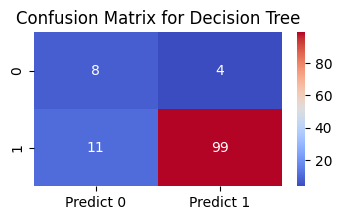

In [ ]:
# Confusion matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_df_tree = pd.DataFrame(cm_tree, index=[i for i in ['0', '1']], columns=[i for i in ['Predict 0', 'Predict 1']])

plt.figure(figsize=(4, 2))
sns.heatmap(cm_df_tree,cmap='coolwarm', annot=True, fmt='g')
plt.title("Confusion Matrix for Decision Tree")
plt.show()


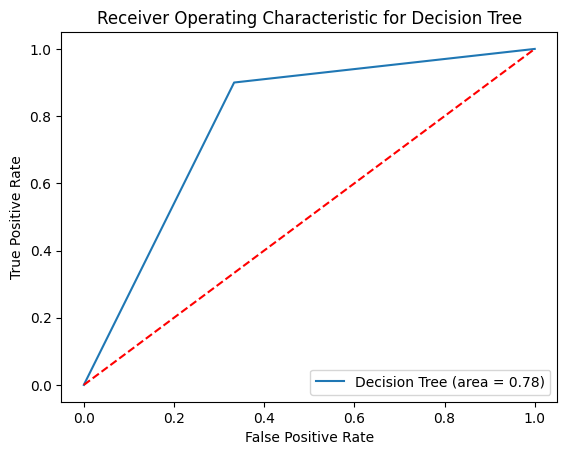

Decision Tree -> Area Under the Curve (AUC):  78.33


In [ ]:
# ROC curve for Decision Tree
y_proba_tree = decision_tree.predict_proba(X_test)[:, 1]  # Probability for the positive class
roc_auc_tree = roc_auc_score(y_test, y_proba_tree)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_proba_tree)

# Plot ROC curve
plt.figure()
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.savefig('Decision_Tree_ROC')
plt.show()

# Print AUC score
print('Decision Tree -> Area Under the Curve (AUC): ', round(roc_auc_tree * 100, 2))

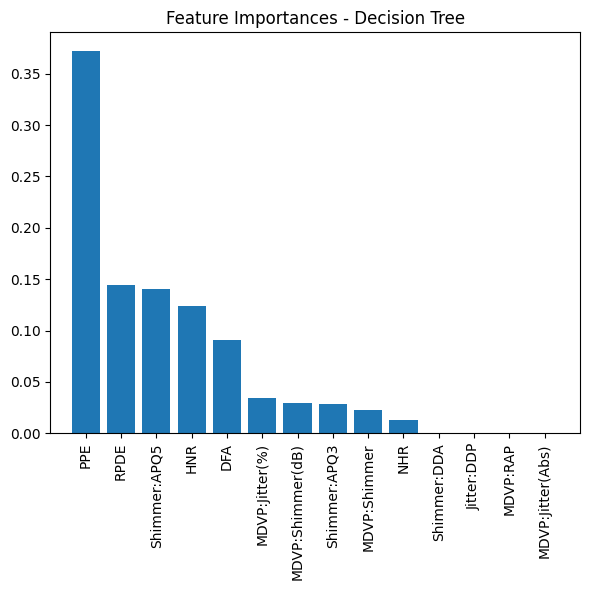

In [ ]:
# Assuming 'dtc' is your decision tree model and 'features' is the list of feature names
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
feature_importances = dtc.feature_importances_
indices = np.argsort(feature_importances)[::-1]
# Assuming X_train is a pandas DataFrame
features = X.columns

plt.figure(figsize=(6, 6))
plt.title("Feature Importances - Decision Tree")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [features[i] for i in indices], rotation=90)
plt.xlim([-1, len(feature_importances)])
plt.tight_layout()
plt.show()

# **RANDOM FOREST**

Accuracy of Random Forest: 95.90%

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.97      0.98      0.98       110

    accuracy                           0.96       122
   macro avg       0.90      0.87      0.88       122
weighted avg       0.96      0.96      0.96       122



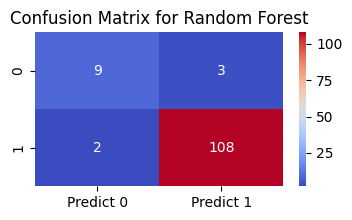

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
 # You can adjust parameters like max_depth, criterion, etc.
rfc.fit(X_train, y_train)

# Evaluate the model
y_pred_tree = rfc.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy of Random Forest: {:.2f}%".format(accuracy_tree * 100))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_tree))

# Confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_df_tree = pd.DataFrame(cm_tree, index=[i for i in ['0', '1']], columns=[i for i in ['Predict 0', 'Predict 1']])

plt.figure(figsize=(4, 2))
sns.heatmap(cm_df_tree,cmap='coolwarm', annot=True, fmt='g')
plt.title("Confusion Matrix for Random Forest")
plt.show()

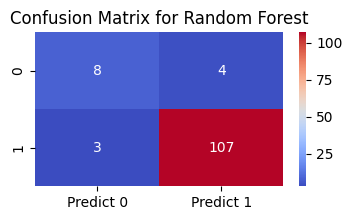

In [ ]:
# Confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_df_tree = pd.DataFrame(cm_tree, index=[i for i in ['0', '1']], columns=[i for i in ['Predict 0', 'Predict 1']])

plt.figure(figsize=(4, 2))
sns.heatmap(cm_df_tree,cmap='coolwarm', annot=True, fmt='g')
plt.title("Confusion Matrix for Random Forest")
plt.show()

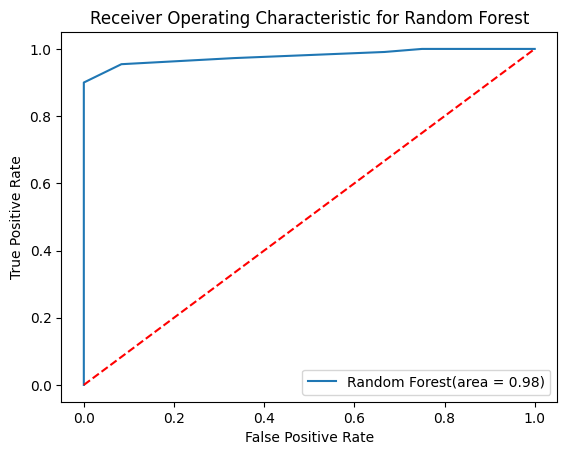

Random forest -> Area Under the Curve (AUC):  97.84


In [ ]:
# ROC curve for
y_proba_tree = rfc.predict_proba(X_test)[:, 1]  # Probability for the positive class
roc_auc_tree = roc_auc_score(y_test, y_proba_tree)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_proba_tree)

# Plot ROC curve
plt.figure()
plt.plot(fpr_tree, tpr_tree, label='Random Forest(area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.savefig('Random_Forest_ROC')
plt.show()

# Print AUC score
print('Random forest -> Area Under the Curve (AUC): ', round(roc_auc_tree * 100, 2))

# **XG BOOST**

In [ ]:
xgb= XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
 # You can adjust parameters like max_depth, criterion, etc.
xgb.fit(X_train, y_train)

# Evaluate the model
y_pred= xgb.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy of XG boost: {:.2f}%".format(accuracy * 100))
print("\nClassification Report for XG boost:\n", classification_report(y_test, y_pred))

# Confusion matrix for XG boost
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=[i for i in ['0', '1']], columns=[i for i in ['Predict 0', 'Predict 1']])

plt.figure(figsize=(4, 2))
sns.heatmap(cm_df_tree,cmap='coolwarm', annot=True, fmt='g')
plt.title("Confusion Matrix for XG boost")
plt.show()

Accuracy of XG boost: 96.72%

Classification Report for XG boost:
               precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        12
         1.0       0.99      0.97      0.98       110

    accuracy                           0.97       122
   macro avg       0.89      0.94      0.91       122
weighted avg       0.97      0.97      0.97       122



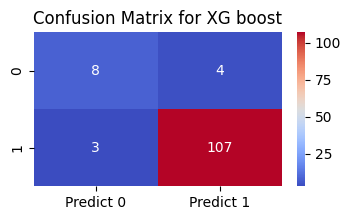

In [ ]:
# Confusion matrix for XG boost
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=[i for i in ['0', '1']], columns=[i for i in ['Predict 0', 'Predict 1']])

plt.figure(figsize=(4, 2))
sns.heatmap(cm_df_tree,cmap='coolwarm', annot=True, fmt='g')
plt.title("Confusion Matrix for XG boost")
plt.show()

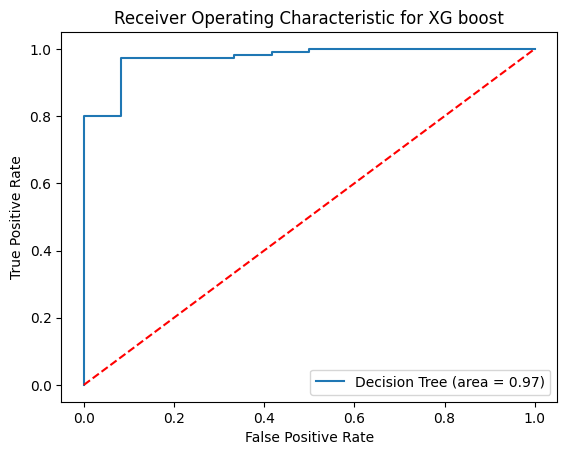

XG boost -> Area Under the Curve (AUC):  97.42


In [ ]:

y_proba = xgb.predict_proba(X_test)[:, 1]  # Probability for the positive class
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XG boost')
plt.legend(loc="lower right")
plt.savefig('XG boost_ROC')
plt.show()

# Print AUC score
print('XG boost -> Area Under the Curve (AUC): ', round(roc_auc * 100, 2))

## **HYBRID MODEL USING ML**

# KNN AND LOGISTIC REGRESSION

In [ ]:


# Define the individual models
knn_clf = KNeighborsClassifier(n_neighbors=5)
logreg_clf = LogisticRegression(random_state=0, max_iter=1000)

# Create the VotingClassifier as the hybrid model
hybrid_model = VotingClassifier(
    estimators=[('knn', knn_clf), ('logreg', logreg_clf)],
    voting='soft'  # 'soft' voting generally performs better for probability-based models
)

# Train the hybrid model
hybrid_model.fit(X_train, y_train)

# Evaluate the hybrid model
y_pred_hybrid = hybrid_model.predict(X_test)
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
print("Accuracy of Hybrid Model: {:.2f}%".format(accuracy_hybrid * 100))
print("\nClassification Report for Hybrid Model:\n", classification_report(y_test, y_pred_hybrid))


Accuracy of Hybrid Model: 95.90%

Classification Report for Hybrid Model:
               precision    recall  f1-score   support

         0.0       0.82      0.75      0.78        12
         1.0       0.97      0.98      0.98       110

    accuracy                           0.96       122
   macro avg       0.90      0.87      0.88       122
weighted avg       0.96      0.96      0.96       122



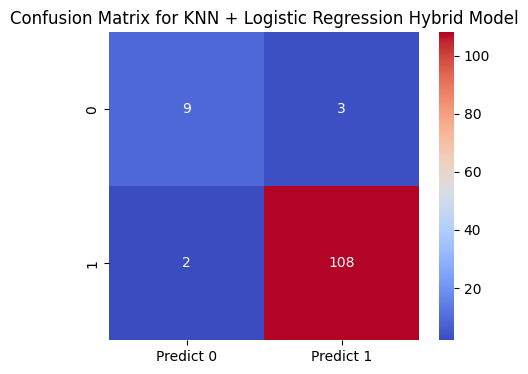

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for the KNN + Logistic Regression hybrid model
# Predict using the KNN + Logistic hybrid (assuming you've saved it in a variable, e.g., y_pred_knn_logreg)
cm_knn_logreg = confusion_matrix(y_test, y_pred_hybrid)
cm_knn_logreg_df = pd.DataFrame(cm_knn_logreg, index=['0', '1'], columns=['Predict 0', 'Predict 1'])

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn_logreg_df, cmap='coolwarm', annot=True, fmt='g')
plt.title("Confusion Matrix for KNN + Logistic Regression Hybrid Model")
plt.show()


Accuracy of Hybrid Model: 97.54%

Classification Report for Hybrid Model:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.99      0.98      0.99       110

    accuracy                           0.98       122
   macro avg       0.92      0.95      0.93       122
weighted avg       0.98      0.98      0.98       122



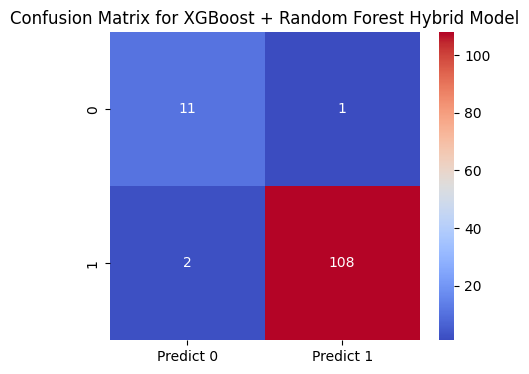

In [ ]:
from sklearn.ensemble import VotingClassifier
# Define the individual models
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Create the VotingClassifier as the hybrid model
hybrid_model = VotingClassifier(
    estimators=[('xgb', xgb_clf), ('rf', rf_clf)],
    voting='hard'  # 'soft' for probability-based voting; 'hard' for majority voting
)

# Train the hybrid model
hybrid_model.fit(X_train, y_train)

# Evaluate the hybrid model
y_pred_hybrid = hybrid_model.predict(X_test)
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
print("Accuracy of Hybrid Model: {:.2f}%".format(accuracy_hybrid * 100))
print("\nClassification Report for Hybrid Model:\n", classification_report(y_test, y_pred_hybrid))

# Confusion matrix for the XGBoost + Random Forest hybrid model
cm_xgb_rf = confusion_matrix(y_test, y_pred_hybrid)
cm_xgb_rf_df = pd.DataFrame(cm_xgb_rf, index=['0', '1'], columns=['Predict 0', 'Predict 1'])

plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb_rf_df, cmap='coolwarm', annot=True, fmt='g')
plt.title("Confusion Matrix for XGBoost + Random Forest Hybrid Model")
plt.show()

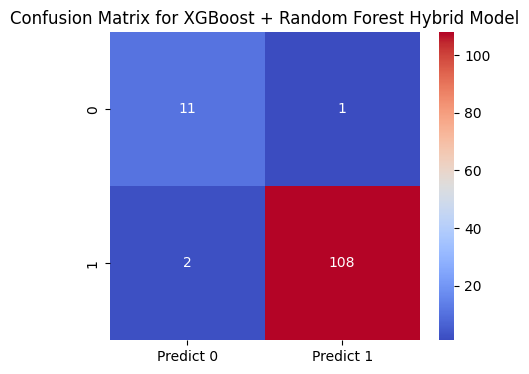

In [ ]:

# Confusion matrix for the XGBoost + Random Forest hybrid model
cm_xgb_rf = confusion_matrix(y_test, y_pred_hybrid)
cm_xgb_rf_df = pd.DataFrame(cm_xgb_rf, index=['0', '1'], columns=['Predict 0', 'Predict 1'])

plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb_rf_df, cmap='coolwarm', annot=True, fmt='g')
plt.title("Confusion Matrix for XGBoost + Random Forest Hybrid Model")
plt.show()


---

## **CONCLUSION: HYBRID MODEL OF ENSEMBLE TECHNIQUES (XG BOOST AND RANDOM FOREST) HAS GIVEN HIGHEST ACCURACY 97.54% WHEN COMPARED TO OTHERS.**

---

GANTT CHART

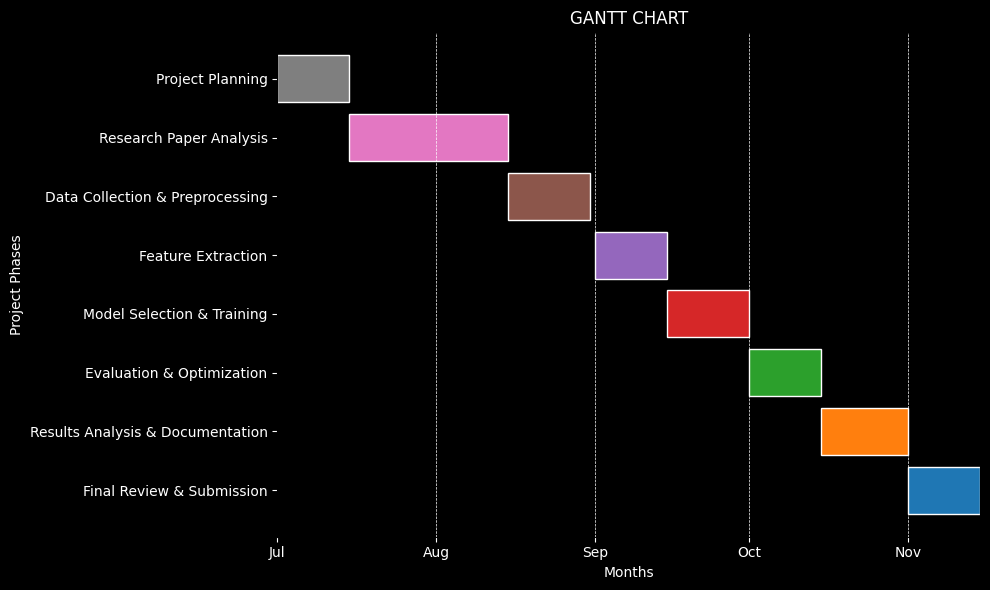

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Define the updated project phases and timeline
phases = [
    "Project Planning",
    "Research Paper Analysis",
    "Data Collection & Preprocessing",
    "Feature Extraction",
    "Model Selection & Training",
    "Evaluation & Optimization",
    "Results Analysis & Documentation",
    "Final Review & Submission"
]

# Define the new start and end dates for each phase
start_dates = [
    datetime(2024, 7, 1),      # Project Planning (July start)
    datetime(2024, 7, 15),     # Research Paper Analysis (mid-July)
    datetime(2024, 8, 15),     # Data Collection & Preprocessing (mid-August)
    datetime(2024, 9, 1),      # Feature Extraction (September start)
    datetime(2024, 9, 15),     # Model Selection & Training (mid-September)
    datetime(2024, 10, 1),     # Evaluation & Optimization (October start)
    datetime(2024, 10, 15),    # Results Analysis & Documentation (mid-October)
    datetime(2024, 11, 1)      # Final Review & Submission (November start)
]

end_dates = [
    datetime(2024, 7, 15),     # Project Planning (mid-July)
    datetime(2024, 8, 15),     # Research Paper Analysis (mid-August)
    datetime(2024, 8, 31),     # Data Collection & Preprocessing (end of August)
    datetime(2024, 9, 15),     # Feature Extraction (mid-September)
    datetime(2024, 10, 1),     # Model Selection & Training (October start)
    datetime(2024, 10, 15),    # Evaluation & Optimization (mid-October)
    datetime(2024, 11, 1),     # Results Analysis & Documentation (November start)
    datetime(2024, 11, 15)     # Final Review & Submission (mid-November)
]

# Reverse the lists to display phases in upside-down order
phases = phases[::-1]
start_dates = start_dates[::-1]
end_dates = end_dates[::-1]

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color to black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Plot each phase as a horizontal bar
for i, phase in enumerate(phases):
    ax.barh(phase, (end_dates[i] - start_dates[i]).days, left=start_dates[i], edgecolor="white")

# Add vertical lines at each month
for month in range(7, 12):  # July to November
    ax.axvline(datetime(2024, month, 1), color="white", linestyle="--", linewidth=0.5)

# Set text color for readability
ax.set_xlabel("Months", color="white")
ax.set_ylabel("Project Phases", color="white")
ax.tick_params(colors="white")  # Set tick color to white

# Format the x-axis to show only the month names
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.set_xlim(datetime(2024, 7, 1), datetime(2024, 11, 15))

# Set title with white color
plt.title("GANTT CHART", color="white")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
# Import required libraries
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
# Load the dataset (replace with your actual dataset)
#data = pd.read_csv('your_dataset.csv')

# Prepare the data
X = data.drop(columns=['status'])  # Features
y = data['status']  # Target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Define the hybrid model function
def predict_status(MDVP_Jitter_perc, MDVP_Jitter_Abs, MDVP_Shimmer, NHR, HNR, RPDE, DFA, PPE):
    """
    Hybrid model prediction combining Random Forest and XGBoost.
    """
    # Combine inputs into a single array
    input_array = np.array([MDVP_Jitter_perc, MDVP_Jitter_Abs, MDVP_Shimmer, NHR, HNR, RPDE, DFA, PPE]).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    # Predictions from both models
    rf_pred = rf_model.predict_proba(input_scaled)[:, 1]
    xgb_pred = xgb_model.predict_proba(input_scaled)[:, 1]

    hybrid_model = VotingClassifier(
        estimators=[('xgb', xgb_clf), ('rf', rf_clf)],
        voting='hard'  # 'soft' for probability-based voting; 'hard' for majority voting
    )
    # Hybrid model prediction (average)
    hybrid_pred = (rf_pred + xgb_pred) / 2
    status = "Parkinson's Positive" if hybrid_pred >= 0.5 else "Parkinson's Negative"
    return status
    # Define the individual models
    xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
    rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Define the Gradio interface
inputs = [
    gr.Number(label="MDVP:Jitter(%)"),
    gr.Number(label="MDVP:Jitter(Abs)"),
    gr.Number(label="MDVP:Shimmer"),
    gr.Number(label="NHR"),
    gr.Number(label="HNR"),
    gr.Number(label="RPDE"),
    gr.Number(label="DFA"),
    gr.Number(label="PPE"),
]

output = gr.Textbox(label="Prediction")

interface = gr.Interface(
    fn=predict_status,
    inputs=inputs,
    outputs=output,
    title="Parkinson's Disease Prediction",
    description="Enter the values of the features to predict the likelihood of Parkinson's disease."
)

# Launch the Gradio app
interface.launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3034f723116e8084a5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://91550253cb1d37e7bd.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://3034f723116e8084a5.gradio.live


In [ ]:
# Import required libraries
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset (replace 'your_dataset.csv' with your file)
#data = pd.read_csv('your_dataset.csv')

# Prepare features (X) and target (y)
X = data.drop(columns=['status'])  # Drop the target column
y = data['status']  # Target column

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the VotingClassifier
voting_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    voting='soft'  # Use probabilities for voting
)

# Train the VotingClassifier
voting_model.fit(X_train, y_train)

# Evaluate the model
y_pred = voting_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.2f}")

# Define the prediction function for Gradio
def predict_status(MDVP_Jitter_perc, MDVP_Jitter_Abs, MDVP_Shimmer, NHR, HNR, RPDE, DFA, PPE):
    """
    Use the trained VotingClassifier to predict status.
    """
    # Combine inputs into a single array
    input_array = np.array([MDVP_Jitter_perc, MDVP_Jitter_Abs, MDVP_Shimmer, NHR, HNR, RPDE, DFA, PPE]).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    # Predict using the voting classifier
    prediction = voting_model.predict(input_scaled)
    status = "Parkinson's Positive" if prediction[0] == 1 else "Parkinson's Negative"
    return status

# Define the Gradio interface
inputs = [
    gr.Number(label="MDVP:Jitter(%)"),
    gr.Number(label="MDVP:Jitter(Abs)"),
    gr.Number(label="MDVP:Shimmer"),
    gr.Number(label="NHR"),
    gr.Number(label="HNR"),
    gr.Number(label="RPDE"),
    gr.Number(label="DFA"),
    gr.Number(label="PPE"),
]

output = gr.Textbox(label="Prediction")

interface = gr.Interface(
    fn=predict_status,
    inputs=inputs,
    outputs=output,
    title="Parkinson's Disease Prediction with Hybrid Model",
    description="Enter the values of the features to predict the likelihood of Parkinson's disease."
)

# Launch the Gradio app
interface.launch()


Voting Classifier Accuracy: 0.95
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://820156a19d3cbb9084.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Import required libraries
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and validate the dataset
try:
    data = pd.read_csv('/content/DATASET.csv')  # Replace with your dataset file
except FileNotFoundError:
    raise Exception("Dataset file not found. Please upload 'your_dataset.csv'.")

# Ensure required columns exist
required_columns = ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR',
                    'HNR', 'RPDE', 'DFA', 'PPE', 'status']
if not all(col in data.columns for col in required_columns):
    raise ValueError("Dataset does not contain all required columns. Please check the column names.")

# Prepare features (X) and target (y)
selected_features = ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR',
                     'HNR', 'RPDE', 'DFA', 'PPE']
X = data[selected_features]  # Select only the required features
y = data['status']  # Target column

# Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the VotingClassifier
voting_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    voting='soft'  # Use probabilities for voting
)

# Train the VotingClassifier
voting_model.fit(X_train, y_train)

# Evaluate the model
y_pred = voting_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.2f}")

# Define the prediction function for Gradio
def predict_status(MDVP_Jitter_perc, MDVP_Jitter_Abs, MDVP_Shimmer, NHR, HNR, RPDE, DFA, PPE):
    """
    Use the trained VotingClassifier to predict status and provide a detailed response.
    """
    try:
        # Combine inputs into a single array
        input_array = np.array([MDVP_Jitter_perc, MDVP_Jitter_Abs, MDVP_Shimmer, NHR, HNR, RPDE, DFA, PPE]).reshape(1, -1)
        input_scaled = scaler.transform(input_array)  # Scale the input using the same scaler

        # Predict using the voting classifier
        prediction = voting_model.predict(input_scaled)
        if prediction[0] == 1:
            return "The patient is diagnosed with Parkinson's disease."
        else:
            return "The patient does not have Parkinson's disease."
    except Exception as e:
        return f"Error during prediction: {e}"

# Define the Gradio interface
inputs = [
    gr.Number(label="MDVP:Jitter(%)"),
    gr.Number(label="MDVP:Jitter(Abs)"),
    gr.Number(label="MDVP:Shimmer"),
    gr.Number(label="NHR"),
    gr.Number(label="HNR"),
    gr.Number(label="RPDE"),
    gr.Number(label="DFA"),
    gr.Number(label="PPE"),
]

output = gr.Textbox(label="Diagnosis")

interface = gr.Interface(
    fn=predict_status,
    inputs=inputs,
    outputs=output,
    title="Parkinson's Disease Prediction with Hybrid Model",
    description="Enter the values of the features to predict the likelihood of Parkinson's disease."
)

# Launch the Gradio app
interface.launch()


Voting Classifier Accuracy: 0.94
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://06cb92774d9da3ba57.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
